# Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)

# Dataset Overview

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [19]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [5]:
print('Shape Train Dataset', df_train.shape)
print('Shape Test Dataset', df_test.shape)

Shape Train Dataset (54808, 13)
Shape Test Dataset (23490, 12)


In [21]:
print('Data Train Missing Values (Percent): ')
df_train.isnull().sum()/len(df_train)*100

Data Train Missing Values (Percent): 


employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [22]:
print('Data Test Missing Values (Percent): ')
df_test.isnull().sum()/len(df_test)*100

Data Test Missing Values (Percent): 


employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [23]:
# we will drop all missing values in test dataset, we avoid missing values imputation in test dataset
df_test = df_test.dropna()
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [24]:
print('Test Dataset Duplicated values Checking')
df_test.duplicated().sum()

Test Dataset Duplicated values Checking


0

# Exploratory Data Analysis

In [4]:
eda = df_train.copy()

In [6]:
cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(include='number').columns

## Descriptive Statistic

### Describe Statistic

In [22]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


### Num of Unique Values and Value Counts

In [30]:
for i in eda.columns:
    if i in cat:
        print(i)
        print(eda[i].value_counts())
        print('\n')
    else:
        print(i)
        print(eda[i].nunique())
        print('\n')

employee_id
54808


department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


education
B

## Univariate Analysis

In [31]:
len(num)

8

### Boxplot

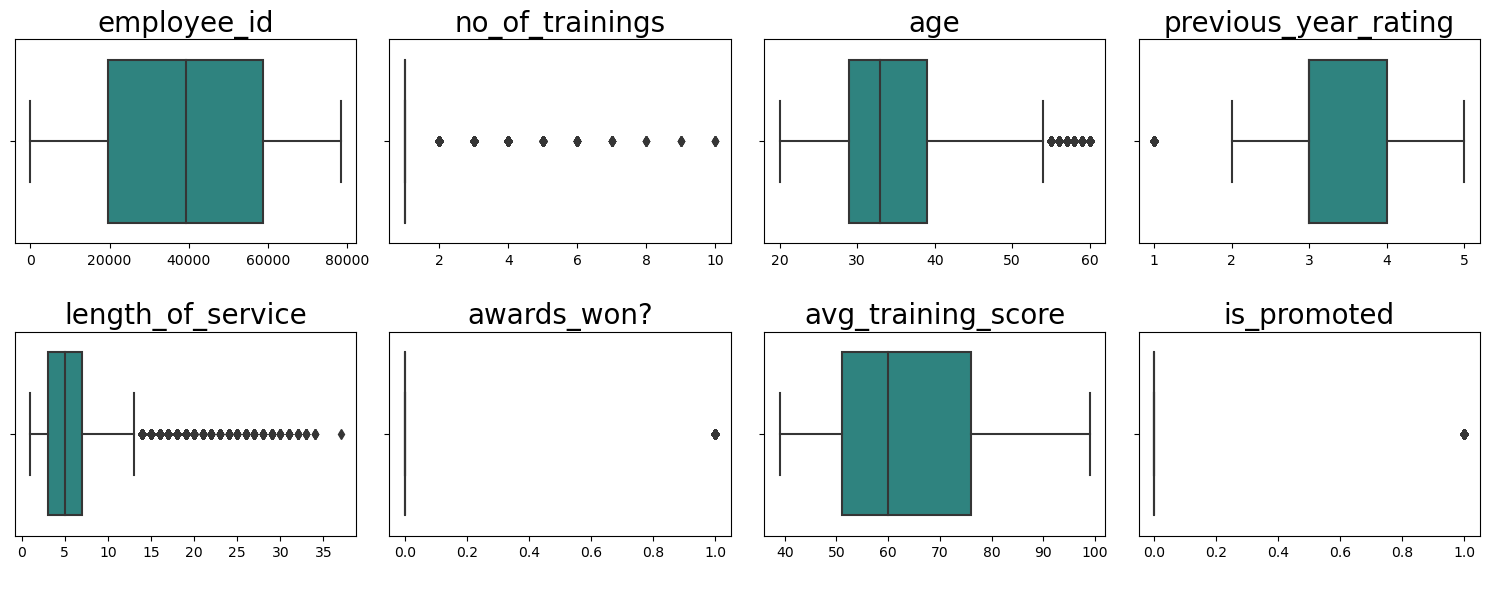

In [46]:
plt.figure(figsize=(15,6))
for i in range(0, len(num)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Displot

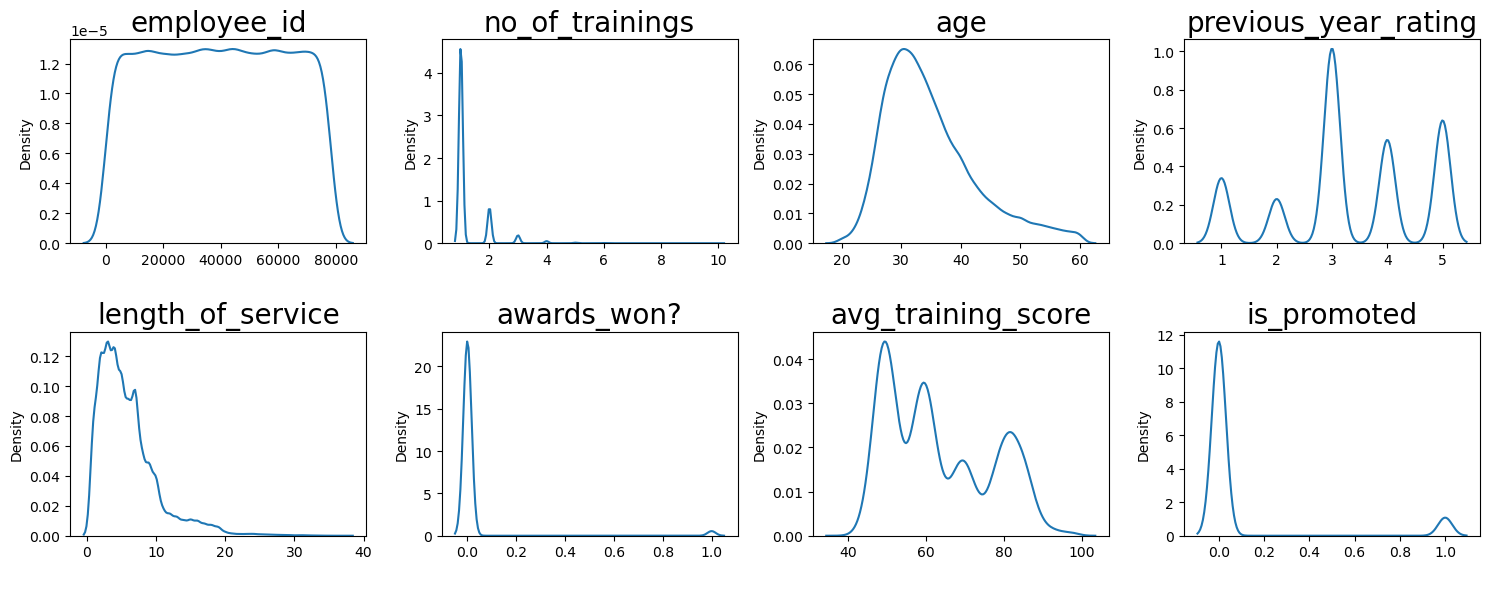

In [47]:
plt.figure(figsize=(15,6))
for i in range(0, len(num)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot

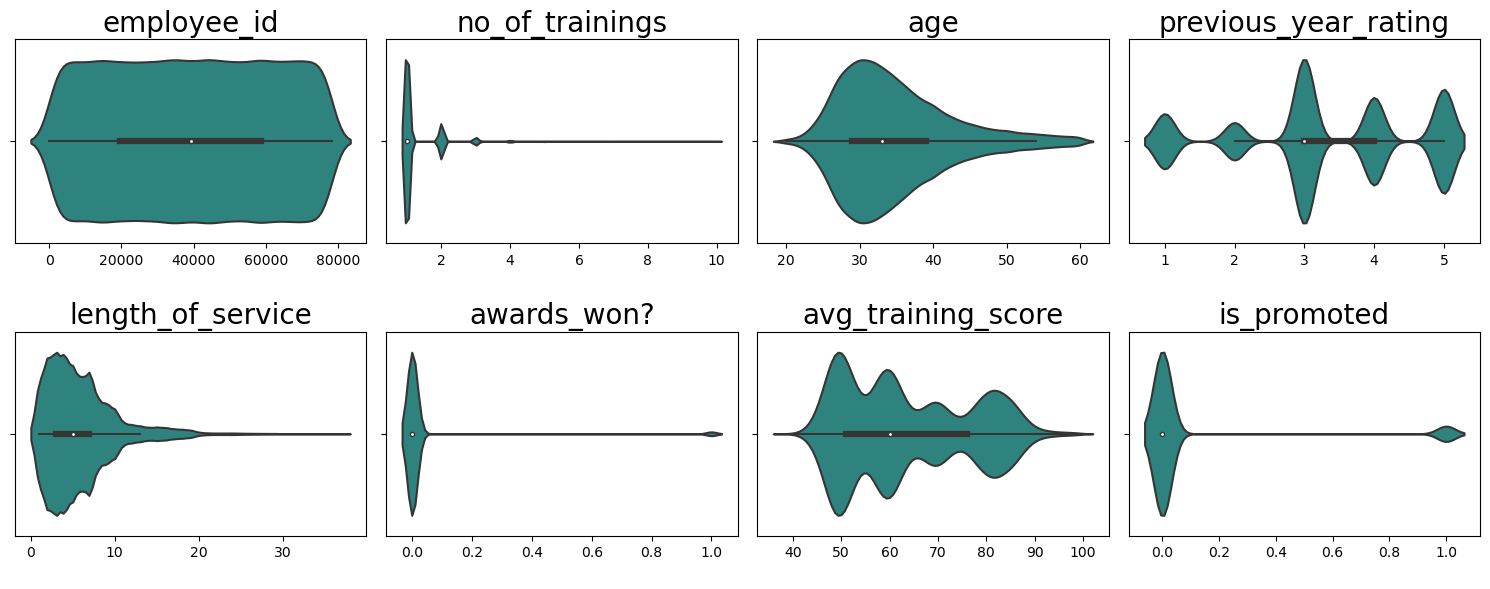

In [49]:
plt.figure(figsize=(15,6))
for i in range(0, len(num)):
    plt.subplot(2,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

### Numeric Feature Analysis

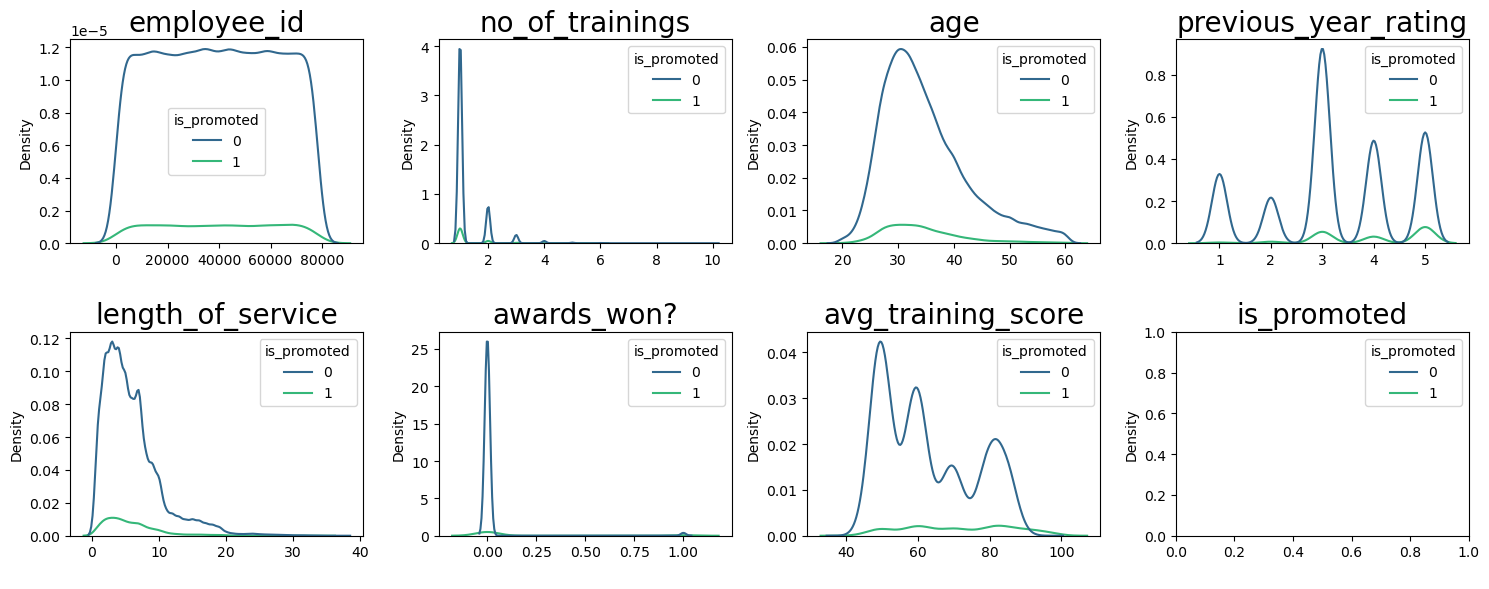

In [50]:
plt.figure(figsize=(15,6))
for i in range(0, len(num)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', hue=eda['is_promoted'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Category Feature Analysis

In [51]:
eda[cat].head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [52]:
len(cat)

5

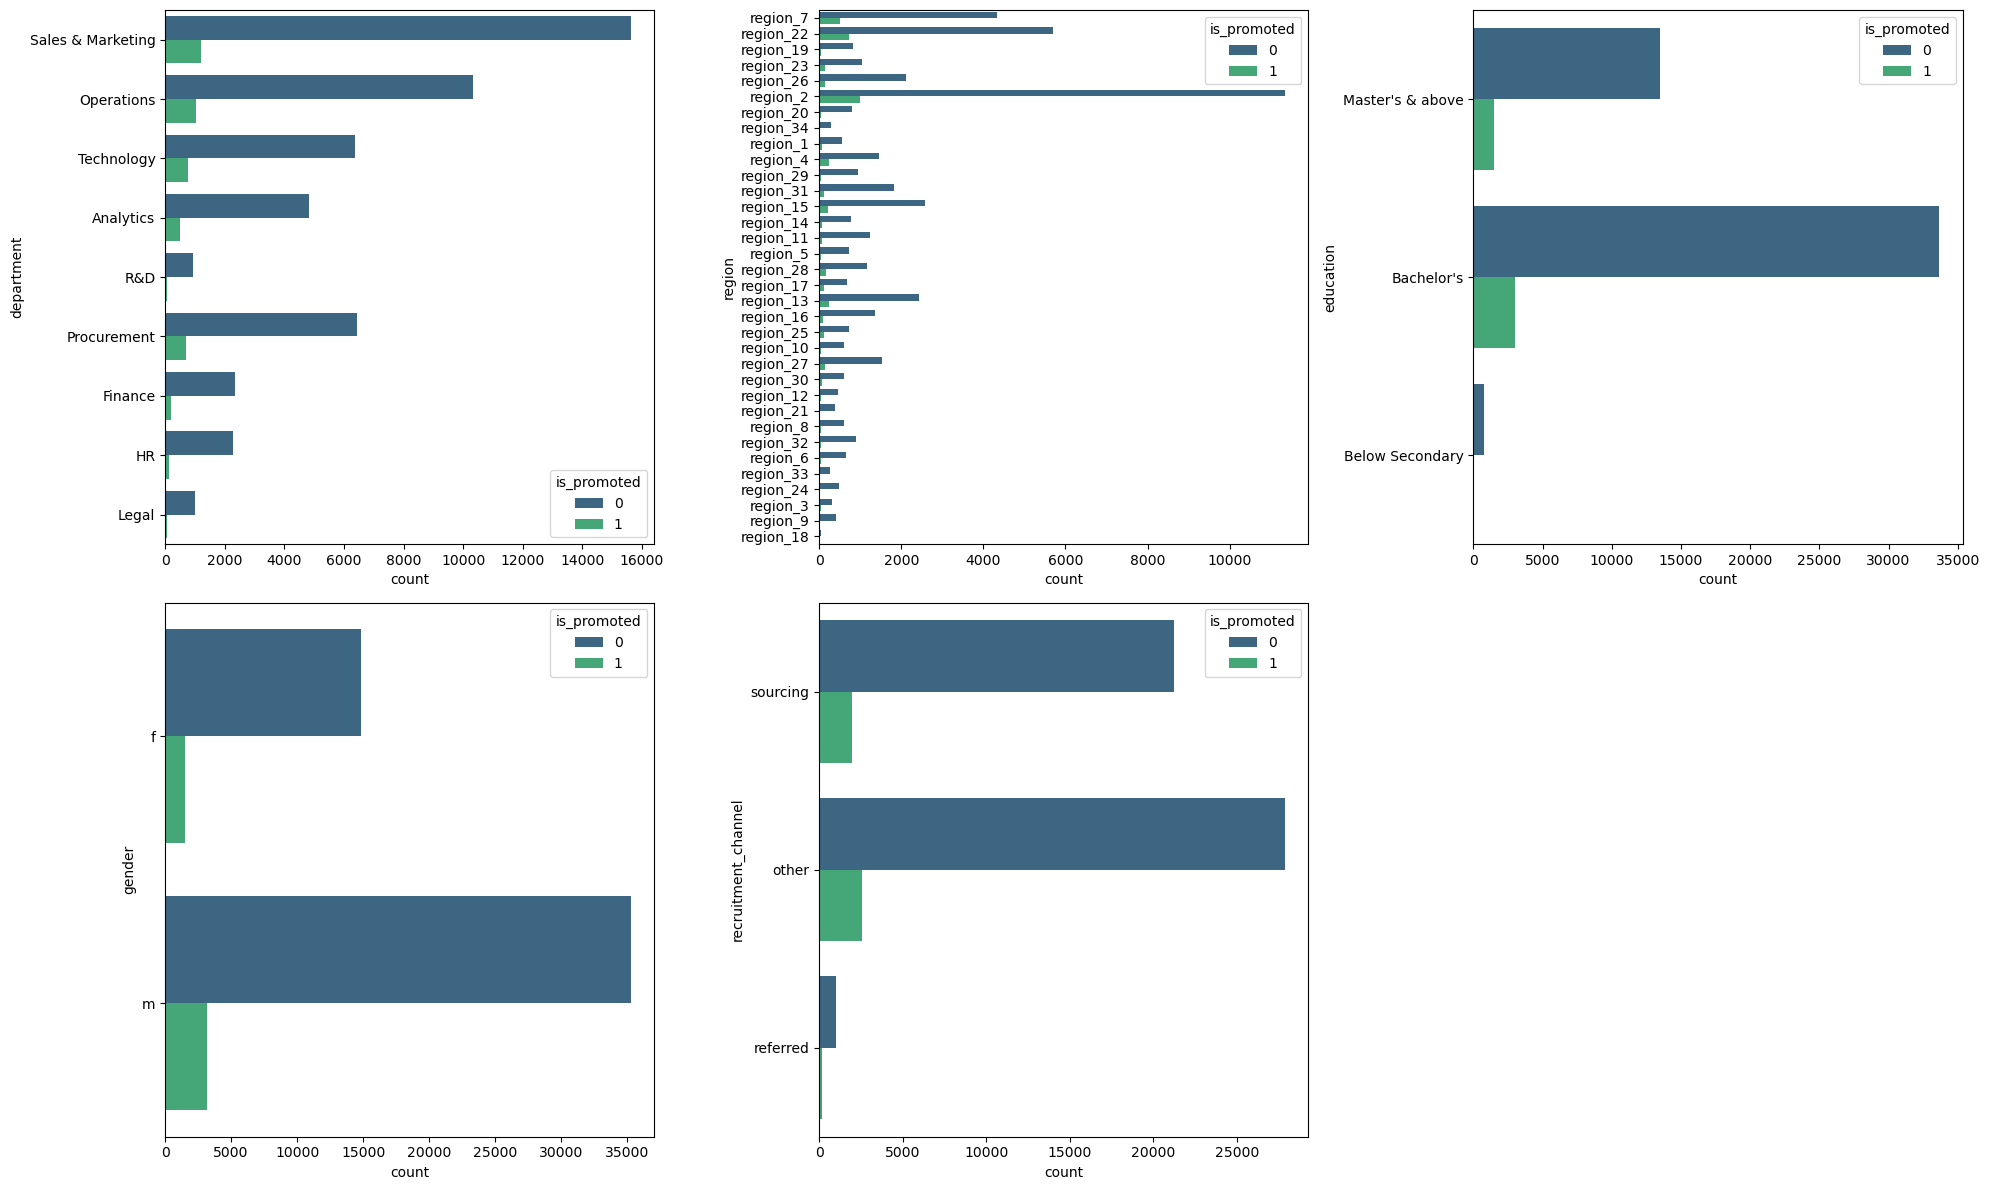

In [54]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for i in range(len(cat)):
    sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], hue=eda['is_promoted'])
    plt.tight_layout() 
axes[1,2].axis('off')
plt.tight_layout()

### Correlation Heatmap

<AxesSubplot:>

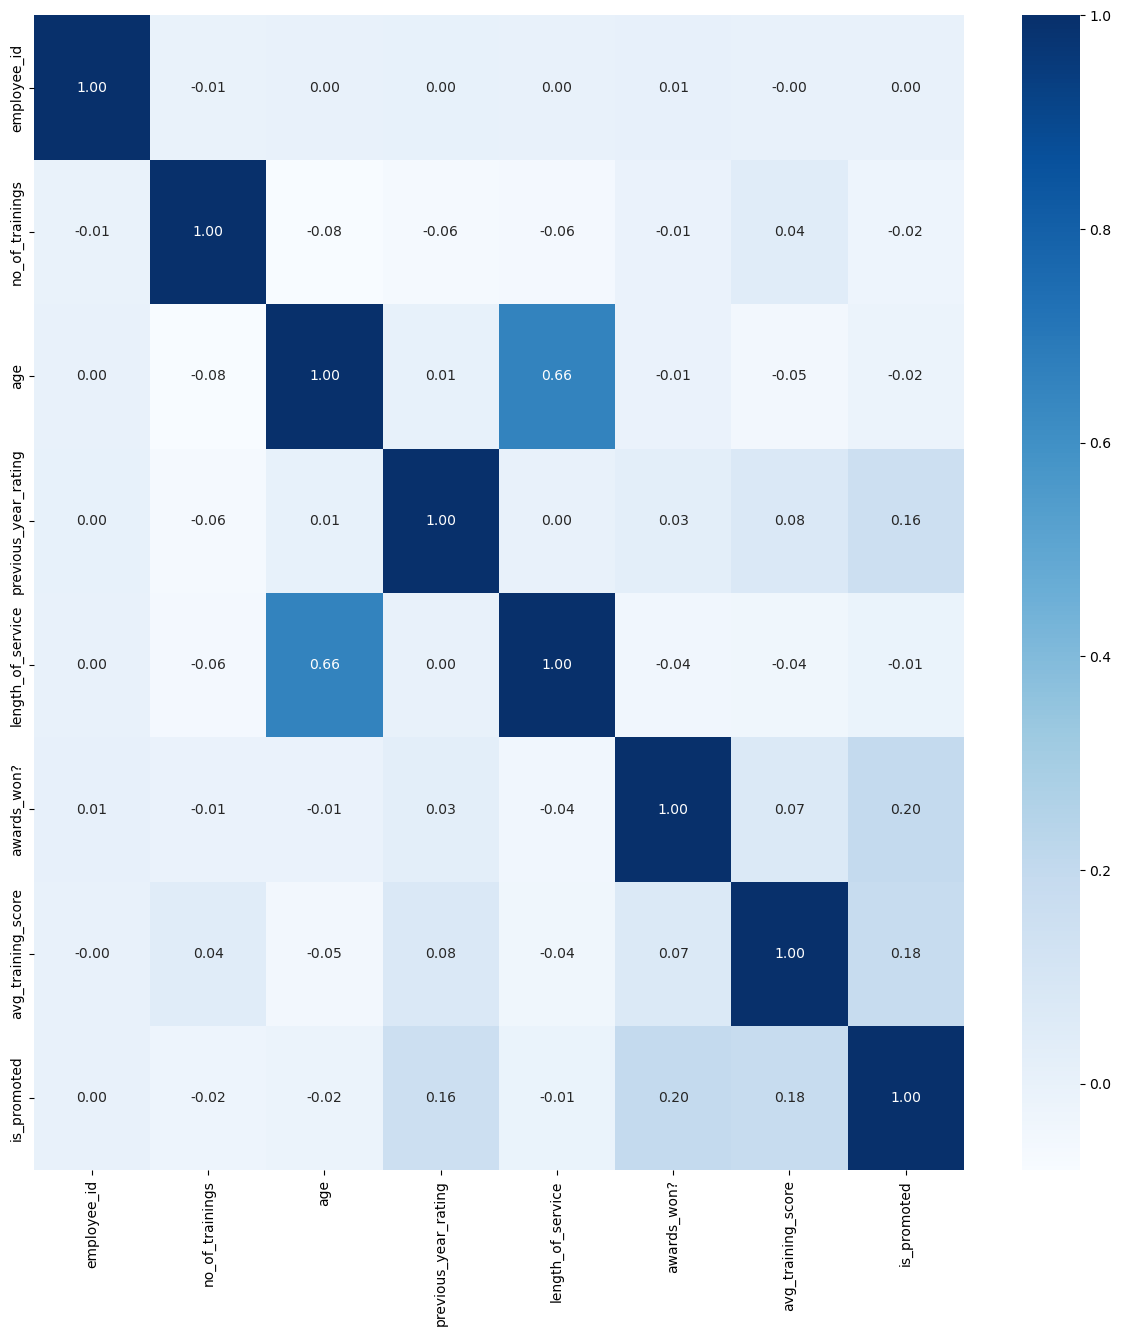

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(eda[num].corr(), cmap='Blues', annot=True, fmt='.2f')

<AxesSubplot:>

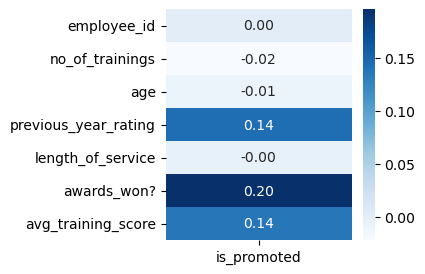

In [58]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features

plt.figure(figsize=(3, 3))
sns.heatmap(eda.corr(method = 'kendall')[eda.corr(method = 'kendall').index != 'is_promoted'][['is_promoted']], cmap='Blues', annot=True, fmt='.2f')

# Data Pre Processing

## Handling Missing Values

In [5]:
print('Data Train Missing Values :')
df_train.isnull().sum()/len(df_train)*100

Data Train Missing Values :


employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

### Education Feature Missing Value Imputation

In [61]:
# check value counts
df_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [66]:
df_train[df_train['education'].isnull()].groupby('department').agg(count=('department','count'))

,count
department,
Analytics,337
Finance,36
HR,32
Legal,4
Operations,226
Procurement,72
R&D,28
Sales & Marketing,1575
Technology,99


In [69]:
df_train[df_train['department']=='Sales & Marketing'].groupby('education').agg(count=('education','count'))

,count
education,
Bachelor's,11099
Master's & above,4166


We will impute `Bachelor's` for missing values because mostly missing values in education located in 'Sales & Marketing' in `department` and most of 'Sales & Marketing' `department` are from `Bachelor's` degree

In [4]:
df_train['education'] = df_train['education'].fillna("Bachelor's")
df_train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

### previous_year_rating Feature Missing Values Imputation

In [87]:
df_train['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [5]:
# impute with median values
df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].median())

### Summary & Rechecking

In [6]:
print('Data Train Missing Values :')
df_train.isnull().sum()/len(df_train)*100

Data Train Missing Values :


employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

## Duplicated Data

In [9]:
print('Num of duplicated values :', df_train.duplicated().sum())

Num of duplicated values : 0


data is clean from duplicated rows, no need to drop duplicated values

## Outlier Handling

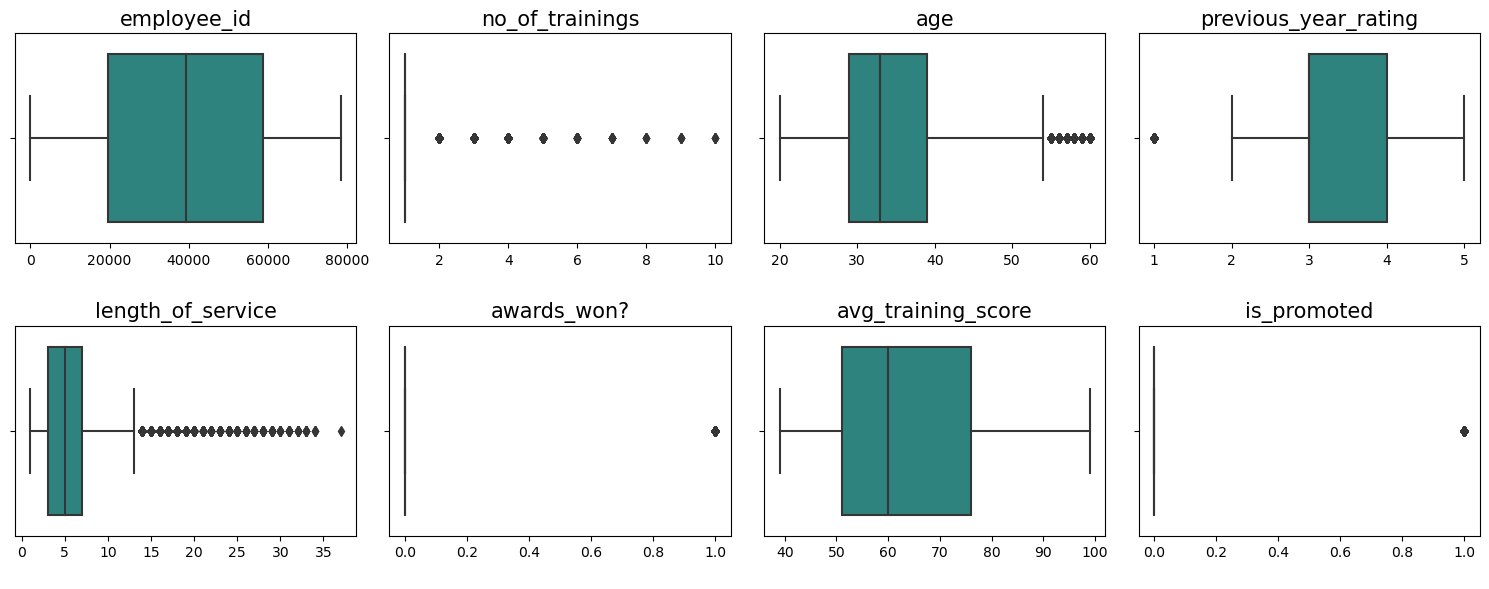

In [92]:
plt.figure(figsize=(15,6))
for i in range(0, len(num)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

All values in numerical features are valid, we don't need to handle outlier

## Feature Encoding

### Train

In [7]:
cat = df_train.select_dtypes(include='object').columns
cat

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [8]:
dummies = pd.get_dummies(df_train[cat], drop_first=True) #one hot encoding
dummies.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
print('Original Num of Features :', df_train.shape[1])
print('Num Features Cat :', df_train[cat].shape[1])
print('Num Dummies Features :', dummies.shape[1])

Original Num of Features : 13
Num Features Cat : 5
Num Dummies Features : 46


In [10]:
# drop original cat features
df_train = df_train.drop(cat, axis=1)

# concate dummies and df_train
df_train = pd.concat([df_train, dummies], axis=1)

# Num of df_train updated
print('Num of features :', df_train.shape[1])

Num of features : 54


In [11]:
X = df_train.drop(['is_promoted','employee_id'], axis=1)
y = df_train['is_promoted']

### Test

In [27]:
df_test[cat].columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [12]:
dummies_test = pd.get_dummies(df_test[cat], drop_first=True) #one hot encoding
dummies_test.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [13]:
print('Original Num of Features :', df_test.shape[1])
print('Num Features Cat :', df_test[cat].shape[1])
print('Num Dummies Features :', dummies_test.shape[1])

Original Num of Features : 12
Num Features Cat : 5
Num Dummies Features : 46


In [14]:
# drop original cat features
df_test = df_test.drop(cat, axis=1)
df_test = df_test.drop('employee_id', axis=1)

# concate dummies and df_train
df_test = pd.concat([df_test, dummies_test], axis=1)

# Num of df_train updated
print('Num of features :', df_test.shape[1])

Num of features : 52


## Feature Selection

### Quassi Constant Feature

In [103]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

50

In [105]:
features_to_keep = X.columns[sel.get_support()]

## let's print the feature that will be removed by Quaasi Constant
quasi_constant = X.columns[~sel.get_support()]
quasi_constant

Index(['region_region_12', 'region_region_18', 'region_region_21',
       'region_region_24', 'region_region_3', 'region_region_33',
       'region_region_34', 'region_region_9'],
      dtype='object')

### Chi Square

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# we use default train data (without scaled and imbalace handled)
selector = SelectKBest(chi2,k=58)
fit = selector.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [108]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
features_keep_chi = featureScores.nlargest(58,'Score')
features_keep_chi

,Features,Score
6,avg_training_score,5072.973743
5,awards_won?,2054.009313
0,employee_id,1037.244033
3,previous_year_rating,574.656810
44,region_region_4,76.809911
30,region_region_22,69.467225
15,department_Technology,46.061828
14,department_Sales & Marketing,37.312181
52,education_Master's & above,34.340794
47,region_region_7,28.400044


### Univariate feature selection

In [112]:
# Import libraries
from sklearn.feature_selection import f_classif, f_regression

# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X, y)

<AxesSubplot:>

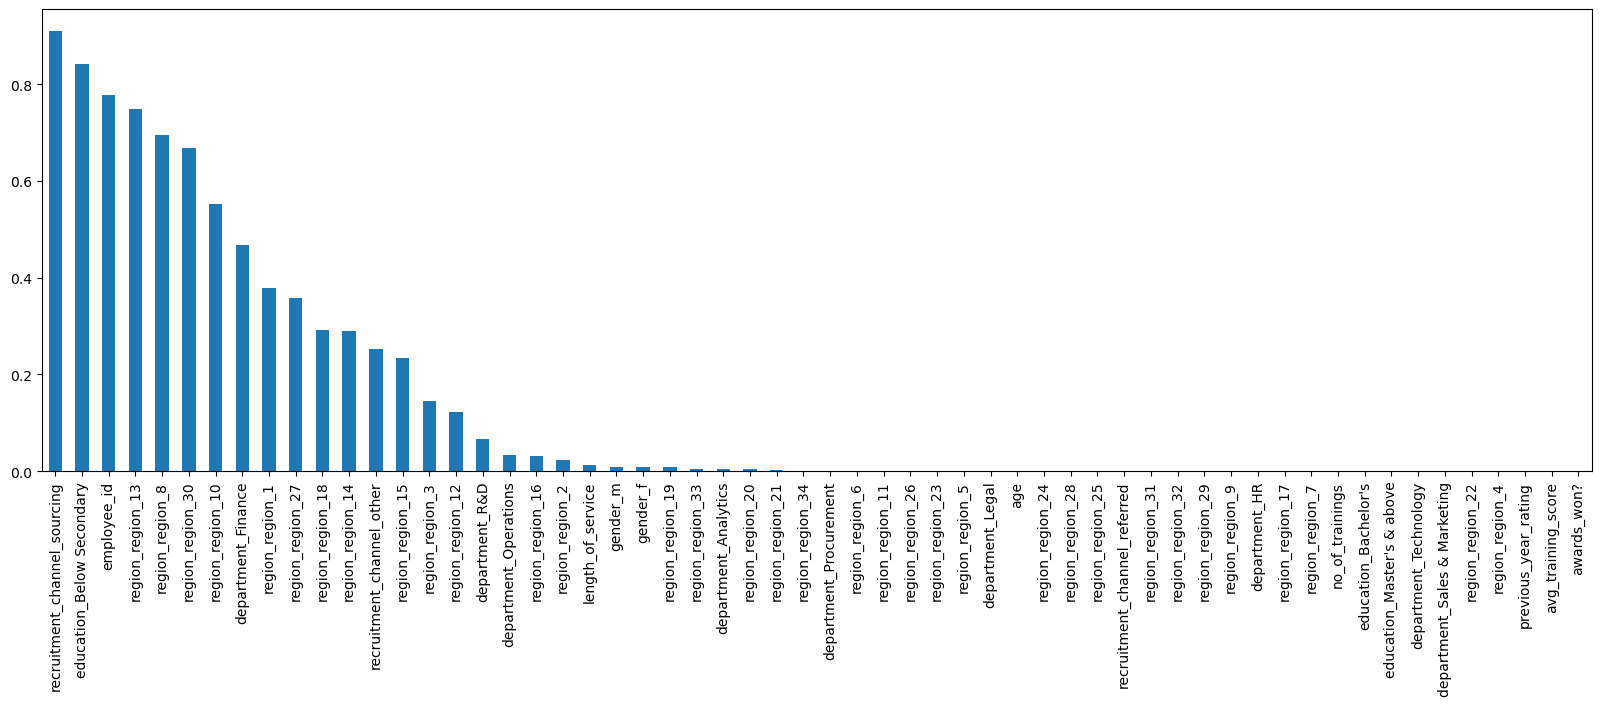

In [114]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

- The smaller the p_value the more predictive the feature is.
- Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

### Mutual Information

In [115]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X, y)

Text(0, 0.5, 'Mutual Information')

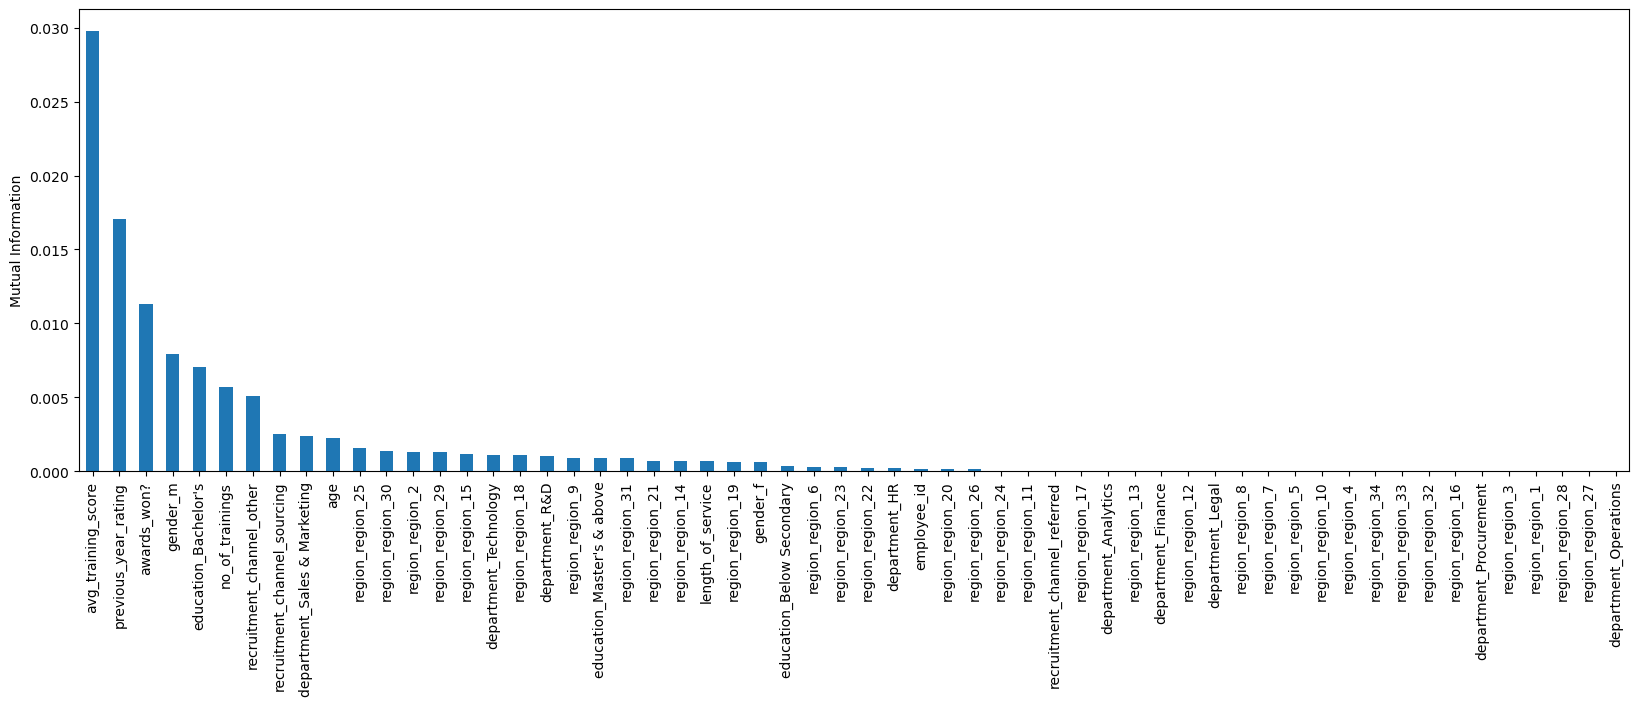

In [116]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot. The higher mutual information value the more predictive value is

### Lasso

In [49]:
# Import Robust Scaler Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Splitting Data Train - Test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

print(f'Total Train Data = {X_train.shape[0]}')
print(f'Total Test Data = {X_test.shape[0]}')

Total Train Data = 38365
Total Test Data = 16443


In [50]:
# Declarate Scaler Function
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Fitting Scaler with Train Data
scaler.fit(X_train)

# Scaling Train and Test Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Create DataFrame from Scaled Array Values

X_train_for_lasso = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_for_lasso = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# fit a Lasso and selet features, make sure to select l1 # kalo pake lasso setelah transformasi

sel_ = SelectFromModel(
    LogisticRegression(C=0.5,
                       penalty='l1',
                       solver='liblinear',
                       random_state=123))

sel_.fit(scaler.transform(X_train_scaled), y_train)

# remove features with zero coefficient from dataset
# and parse again as dataframe

X_train_lasso = pd.DataFrame(sel_.transform(X_train_for_lasso))
X_test_lasso = pd.DataFrame(sel_.transform(X_test_for_lasso))

# add the columns name
X_train_lasso.columns = X_train_for_lasso.columns[(sel_.get_support())]
X_test_lasso.columns = X_test_for_lasso.columns[(sel_.get_support())]

In [55]:
# let's print the feature that will be removed by Lasso
X_train_for_lasso.columns[(~sel_.get_support())]

Index(['no_of_trainings', 'length_of_service', 'department_HR',
       'region_region_10', 'region_region_14', 'region_region_18',
       'region_region_8', 'education_Below Secondary'],
      dtype='object')

### Summary

In [ ]:
quasi_constant

In [56]:
quasi = ['region_region_12', 'region_region_18', 'region_region_21',
         'region_region_24', 'region_region_3', 'region_region_33',
         'region_region_34', 'region_region_9']

lasso =  ['department_Finance', 'region_region_10',
          'region_region_14', 'region_region_26',
          'region_region_8', 'gender_f',
          'recruitment_channel_referred']

print('Len Quasi', len(quasi))
print('Lasso', len(lasso))

Len Quasi 8
Lasso 7


In [57]:
# Summary of all feature selection method + business acumen
col = ['avg_training_score', 'awards_won?', 'previous_year_rating', 'age', 'gender_m',
       "education_Master's & above", 'no_of_trainings', 'length_of_service']

## Handling Imbalaced Target

In [15]:
# check how imbalance the targe is
y.value_counts()/len(y)*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

In [16]:
# Import Robust Scaler Library
from sklearn.model_selection import train_test_split

# Splitting Data Train - Test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=21)

print(f'Total Train Data = {X_train.shape[0]}')
print(f'Total Test Data = {X_test.shape[0]}')

Total Train Data = 38365
Total Test Data = 16443


In [17]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=123, sampling_strategy=0.5)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [60]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_smote shape :', X_smote.shape)
print('y_smote shape :', y_smote.shape)

X_train shape : (38365, 52)
y_train shape : (38365,)
X_smote shape : (52735, 52)
y_smote shape : (52735,)


# Modeling

In [18]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

## Basic Modeling

In [62]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

[21:56:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.849298,0.210466,0.253425,0.229956
1,Decision Tree,0.858602,0.288715,0.404795,0.337040
2,Random Forest,0.919662,0.581287,0.340411,0.429374
3,Ada Boost,0.849298,0.210466,0.253425,0.229956
4,Gradient Boost,0.917108,0.560099,0.309589,0.398765
5,XG Boost,0.927750,0.660000,0.384247,0.485714


In [64]:
# feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(5, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(model, fontsize=10)

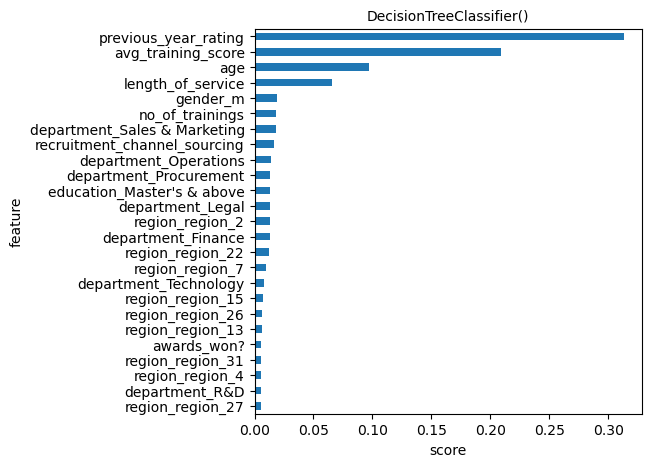

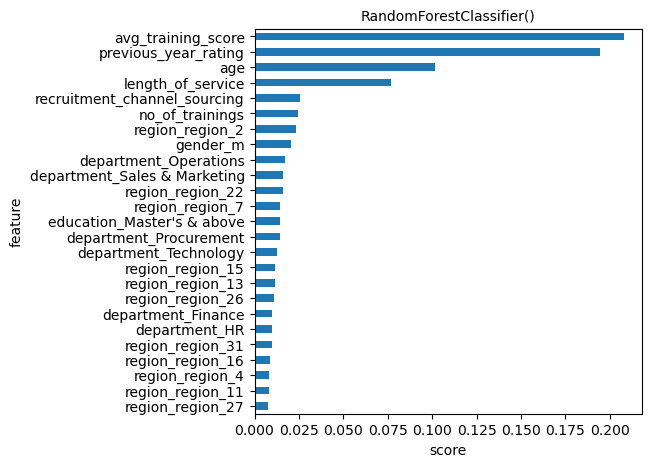

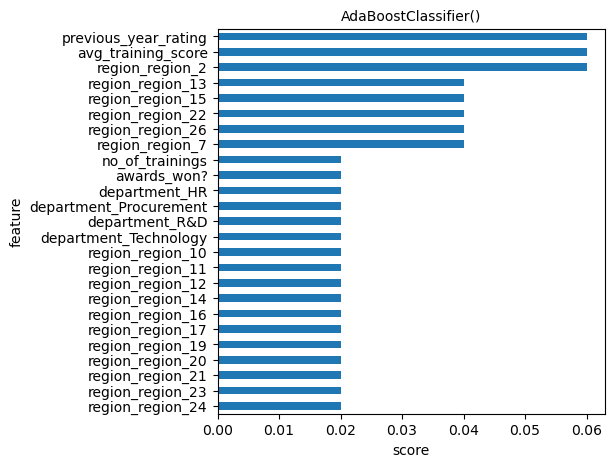

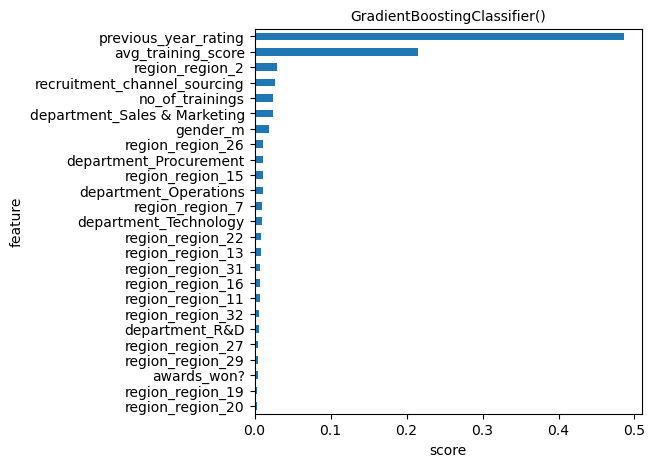

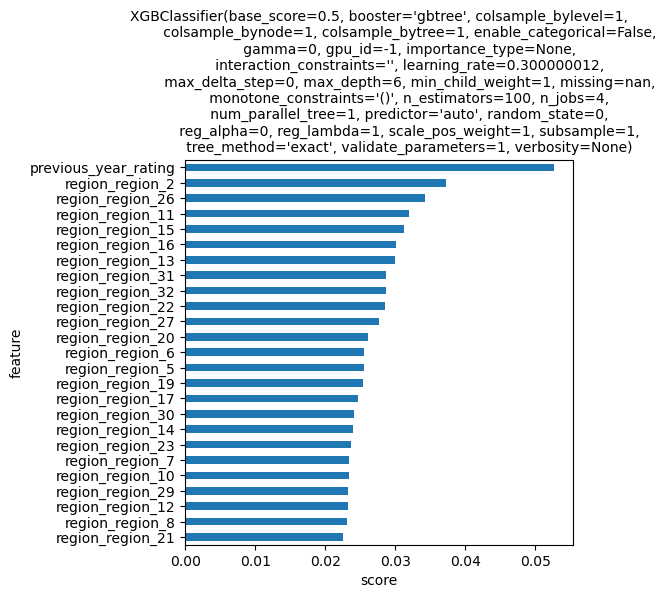

In [65]:
model = [dt_sm, rf_sm, ab_sm, gb_sm, xg_sm]

for i in model:
    show_feature_importance(i)
    plt.show()

In [92]:
col2 = ['previous_year_rating', "education_Master's & above",
        'department_Procurement', 'avg_training_score', 'department_Technology']

## Basic Modeling Using Selected Feature in Feature Selection

In [67]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote[col], y_smote)
dt_sm.fit(X_smote[col], y_smote)
rf_sm.fit(X_smote[col], y_smote)
ab_sm.fit(X_smote[col], y_smote)
gb_sm.fit(X_smote[col], y_smote)
xg_sm.fit(X_smote[col], y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test[col])
y_pred_dt_sm = dt_sm.predict(X_test[col])
y_pred_rf_sm = rf_sm.predict(X_test[col])
y_pred_ab_sm = lr_sm.predict(X_test[col])
y_pred_gb_sm = gb_sm.predict(X_test[col])
y_pred_xg_sm = xg_sm.predict(X_test[col])

[21:58:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.841270,0.241224,0.367123,0.291146
1,Decision Tree,0.837560,0.209034,0.297945,0.245693
2,Random Forest,0.866509,0.255814,0.263699,0.259696
3,Ada Boost,0.841270,0.241224,0.367123,0.291146
4,Gradient Boost,0.891078,0.365556,0.308219,0.334448
5,XG Boost,0.887308,0.342422,0.292466,0.315478


In [69]:
# feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote[col].columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(5, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(model, fontsize=10)

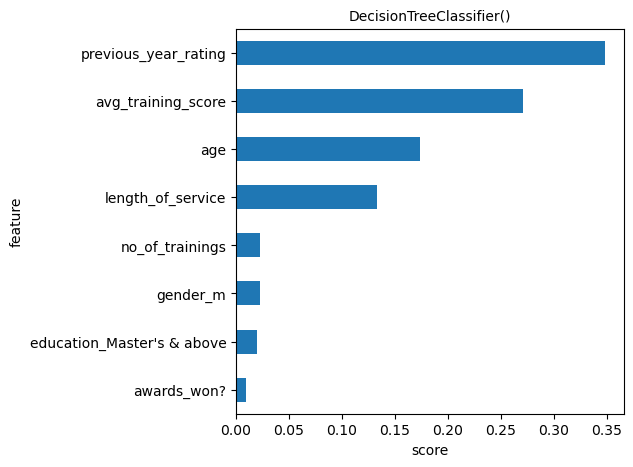

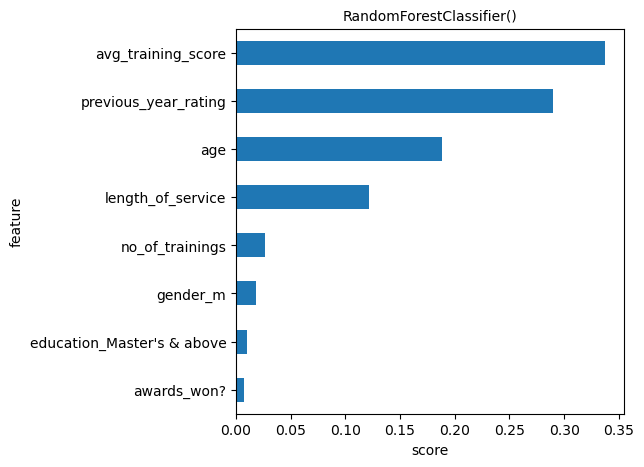

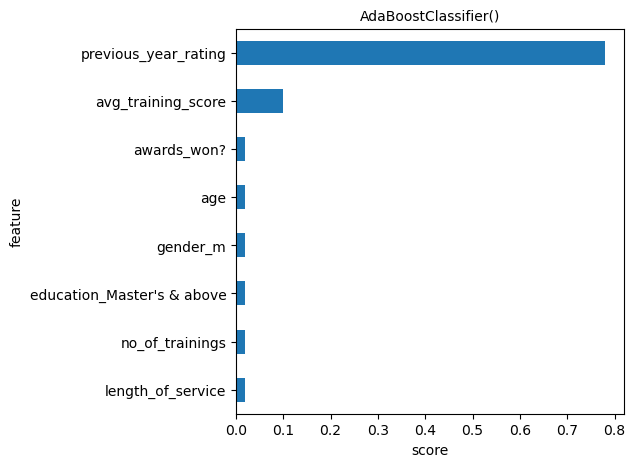

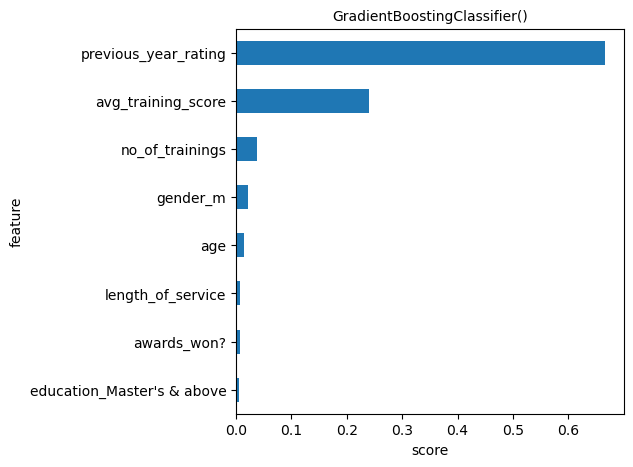

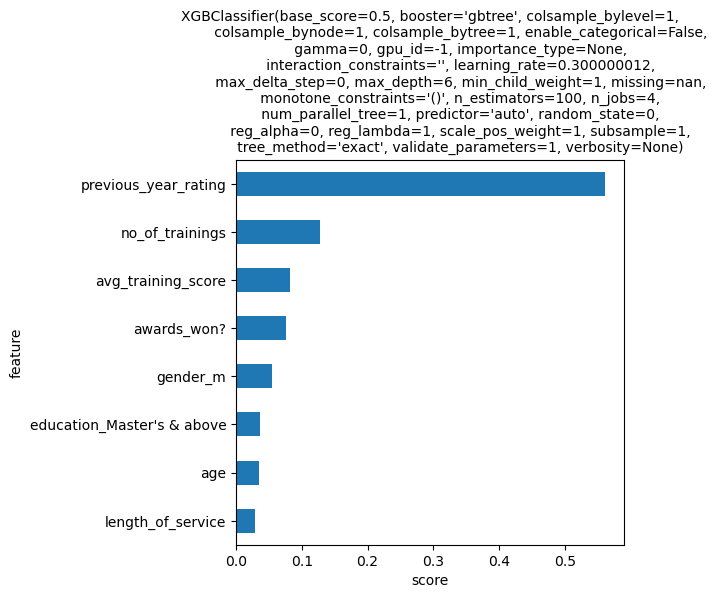

In [70]:
model = [dt_sm, rf_sm, ab_sm, gb_sm, xg_sm]

for i in model:
    show_feature_importance(i)
    plt.show()

## Hyperparameter

### Random Forest Hyperparameter

max_depth: 1; train: 0.0; test: 0.0
max_depth: 2; train: 0.8409090909090909; test: 0.9310344827586207
max_depth: 3; train: 0.8755555555555555; test: 0.9230769230769231
max_depth: 5; train: 0.5051993067590987; test: 0.5207100591715976
max_depth: 6; train: 0.48148148148148145; test: 0.486088379705401
max_depth: 7; train: 0.4533001245330012; test: 0.465149359886202
max_depth: 9; train: 0.4897186147186147; test: 0.47868453105968334
max_depth: 10; train: 0.48761609907120745; test: 0.4645858343337335
max_depth: 11; train: 0.5184275184275184; test: 0.4869169510807736
max_depth: 13; train: 0.566020730058585; test: 0.49836779107725787
max_depth: 14; train: 0.6179117911791179; test: 0.5167206040992449
max_depth: 15; train: 0.6411042944785276; test: 0.5294784580498866
max_depth: 17; train: 0.6792; test: 0.5147679324894515
max_depth: 18; train: 0.6989698588325067; test: 0.5153374233128835
max_depth: 19; train: 0.7246216315983758; test: 0.5151821862348178
max_depth: 21; train: 0.7768391411474833; t

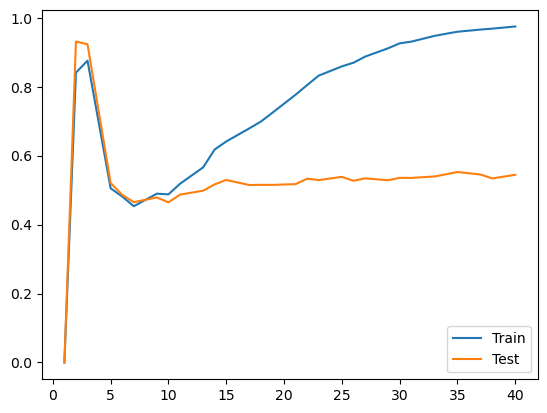

In [76]:
#values = ['gini','entropy'] #criterion
values = [int(x) for x in np.linspace(1,40,30)] #max_depth
#values = [int)x for x in np.linspace(0,40,30)] #min_samples_split
#values = [int)x for x in np.linspace(0,40,30)] #min_samples_leaf
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf = RandomForestClassifier(max_depth=x, 
                                      random_state=2) 
    
    model_rf.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train = model_rf.predict(X_train)
    train_prec = precision_score(y_train, y_pred_train)
    train_score.append(train_prec)
    
    # eval on test
    y_pred_test = model_rf.predict(X_test)
    test_prec = precision_score(y_test, y_pred_test)
    test_score.append(test_prec)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_prec) + '; test: ' + str(test_prec))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 3; train: 0.8755555555555555; test: 0.9230769230769231

min_samples_leaf: 2; train: 0.8761061946902655; test: 0.9230769230769231
min_samples_leaf: 3; train: 0.8761061946902655; test: 0.9230769230769231
min_samples_leaf: 4; train: 0.875; test: 0.9222222222222223
min_samples_leaf: 5; train: 0.8783783783783784; test: 0.9213483146067416
min_samples_leaf: 7; train: 0.8783783783783784; test: 0.9213483146067416
min_samples_leaf: 8; train: 0.8783783783783784; test: 0.9213483146067416
min_samples_leaf: 9; train: 0.875; test: 0.9213483146067416
min_samples_leaf: 11; train: 0.8755555555555555; test: 0.9213483146067416
min_samples_leaf: 12; train: 0.8761061946902655; test: 0.9213483146067416
min_samples_leaf: 13; train: 0.8761061946902655; test: 0.9213483146067416
min_samples_leaf: 15; train: 0.8716814159292036; test: 0.9213483146067416
min_samples_leaf: 16; train: 0.8716814159292036; test: 0.9213483146067416
min_samples_leaf: 17; train: 0.8766519823788547; test: 0.9222222222222223
min_samples_leaf: 19; train: 0.8640350877192983; test: 0.91208791208791

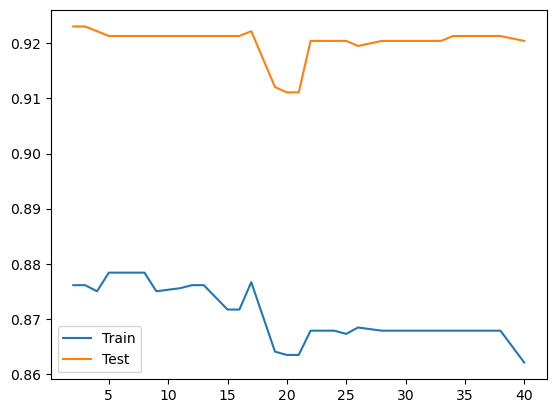

In [80]:
#values = ['gini','entropy'] #criterion
#values = [int(x) for x in np.linspace(1,40,30)] #max_depth
#values = [int(x) for x in np.linspace(3,40,30)] #min_samples_split
values = [int(x) for x in np.linspace(2,40,30)] #min_samples_leaf
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf = RandomForestClassifier(max_depth=3, 
                                      random_state=2,
                                      min_samples_leaf=x)
    
    model_rf.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train = model_rf.predict(X_train)
    train_auc = precision_score(y_train, y_pred_train)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test = model_rf.predict(X_test)
    test_auc = precision_score(y_test, y_pred_test)
    test_score.append(test_auc)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 5; train: 0.8783783783783784; test: 0.9213483146067416

criterion: gini; train: 0.8783783783783784; test: 0.9213483146067416
criterion: entropy; train: 0.919831223628692; test: 0.9603960396039604


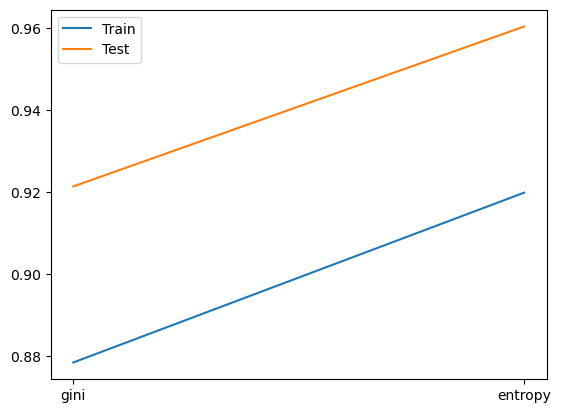

In [82]:
values = ['gini','entropy'] #criterion
#values = [int(x) for x in np.linspace(1,40,30)] #max_depth
#values = [int(x) for x in np.linspace(3,40,30)] #min_samples_split
#values = [int(x) for x in np.linspace(2,40,30)] #min_samples_leaf
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf = RandomForestClassifier(max_depth=3, 
                                      random_state=2,
                                      min_samples_leaf=5,
                                      criterion=x)
    
    model_rf.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train = model_rf.predict(X_train)
    train_auc = precision_score(y_train, y_pred_train)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test = model_rf.predict(X_test)
    test_auc = precision_score(y_test, y_pred_test)
    test_score.append(test_auc)
    
    print('criterion: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

max_features: auto; train: 0.919831223628692; test: 0.9603960396039604
max_features: sqrt; train: 0.919831223628692; test: 0.9603960396039604
max_features: log2; train: 0.8957055214723927; test: 0.9692307692307692


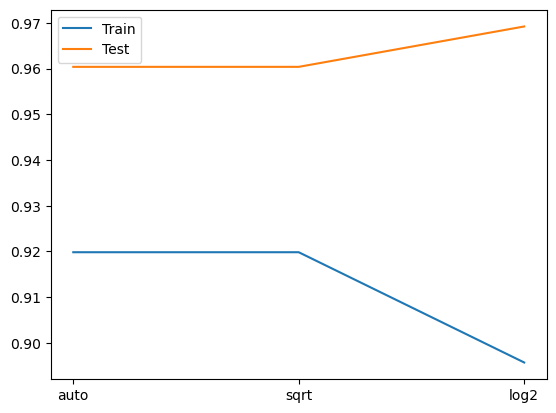

In [83]:
#values = ['gini','entropy'] #criterion
#values = [int(x) for x in np.linspace(1,40,30)] #max_depth
#values = [int(x) for x in np.linspace(3,40,30)] #min_samples_split
#values = [int(x) for x in np.linspace(2,40,30)] #min_samples_leaf
values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf = RandomForestClassifier(max_depth=3, 
                                      random_state=2,
                                      min_samples_leaf=5,
                                      criterion='entropy',
                                      max_features=x)
    
    model_rf.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train = model_rf.predict(X_train)
    train_auc = precision_score(y_train, y_pred_train)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test = model_rf.predict(X_test)
    test_auc = precision_score(y_test, y_pred_test)
    test_score.append(test_auc)
    
    print('max_features: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [19]:
model_rf = RandomForestClassifier(max_depth=3, 
                                      random_state=2,
                                      min_samples_leaf=5,
                                      criterion='entropy',
                                      max_features='auto')
    
model_rf.fit(X_smote,y_smote)
    
# eval on train
y_pred_train = model_rf.predict(X_train)
train_prec = precision_score(y_train, y_pred_train)
    
# eval on test
y_pred_test = model_rf.predict(X_test)
test_prec = precision_score(y_test, y_pred_test)

print('Precision Train Score :', train_prec)
print('Precision Test Score :', test_prec)

Precision Train Score : 0.919831223628692
Precision Test Score : 0.9603960396039604


In [85]:
# feature importance
def show_feature_importance(model, title):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(5, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(title, fontsize=10)

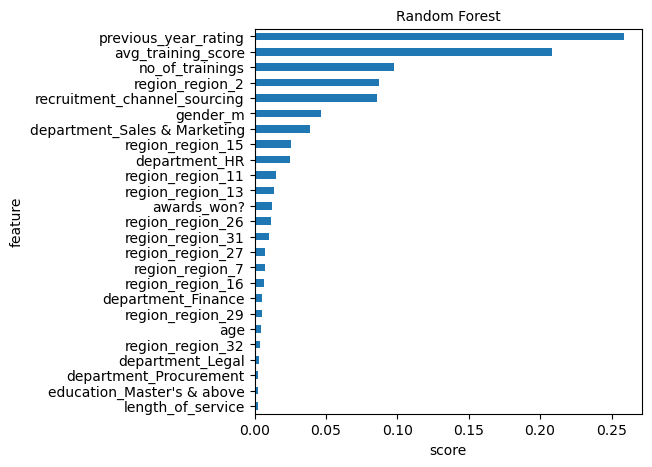

In [86]:
show_feature_importance(model_rf, 'Random Forest')

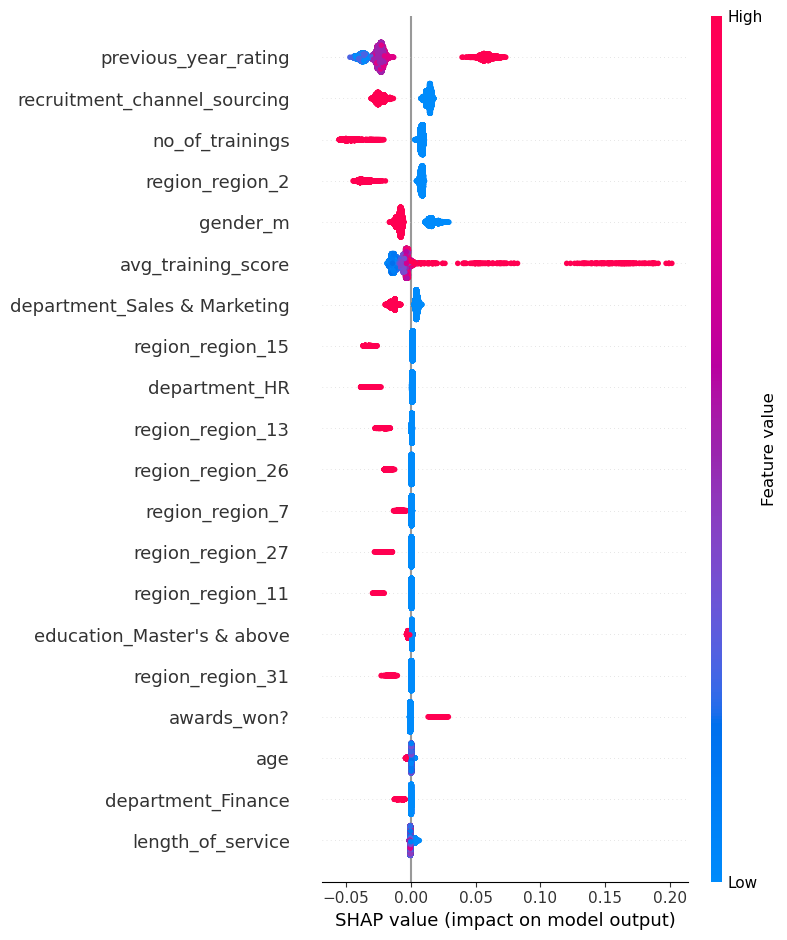

In [87]:
import shap
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

### XGBClassifier Hyperparameter

max_depth: 1; train: 0.34613686534216337; test: 0.36852394916911047
max_depth: 3; train: 0.5930580490724118; test: 0.5914948453608248
max_depth: 5; train: 0.6761957119296317; test: 0.6350184956843403
max_depth: 7; train: 0.7172884918549658; test: 0.6289156626506024
max_depth: 9; train: 0.7783179387457463; test: 0.6486796785304249
max_depth: 11; train: 0.8249443207126949; test: 0.6257046223224352
max_depth: 13; train: 0.8596; test: 0.6181619256017505
max_depth: 15; train: 0.9090909090909091; test: 0.6263982102908278
max_depth: 17; train: 0.9453310696095076; test: 0.618995633187773
max_depth: 20; train: 0.9709228824273072; test: 0.6015037593984962


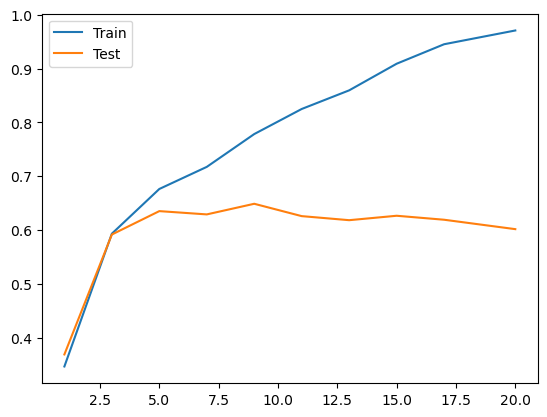

In [95]:
values = [int(x) for x in np.linspace(start=1, stop=20, num=10)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score = []
test_score = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=x,
                                    random_state=3,
                                    verbosity=0)
    model_xg_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_xg = model_xg_tunned.predict(X_train)
    train_prec = precision_score(y_train, y_pred_train_xg)
    train_score.append(train_prec)
    
    # eval on test
    y_pred_test_xg = model_xg_tunned.predict(X_test)
    test_prec = precision_score(y_test, y_pred_test_xg)
    test_score.append(test_prec)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_prec) + '; test: ' + str(test_prec))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

we're not gonna continue using this algorithm because too overfiting and we also have already found the better algorithm (Random Forest)

### Gradient Boost Hyperparameter

max_depth: 1; train: 0.3197695354699316; test: 0.33252230332522303
max_depth: 2; train: 0.4555614688664183; test: 0.4797136038186158
max_depth: 3; train: 0.5417607223476298; test: 0.5600991325898389
max_depth: 5; train: 0.6497524752475248; test: 0.6236111111111111
max_depth: 6; train: 0.7313432835820896; test: 0.6480218281036835
max_depth: 7; train: 0.7748538011695907; test: 0.6571428571428571
max_depth: 9; train: 0.8165185572399373; test: 0.6156626506024097
max_depth: 10; train: 0.8420794507111329; test: 0.6140552995391705
max_depth: 11; train: 0.8506829957607159; test: 0.6044864226682408
max_depth: 13; train: 0.8909163030543436; test: 0.5969331872946331
max_depth: 14; train: 0.8944053353093738; test: 0.5708333333333333
max_depth: 15; train: 0.9113524877365101; test: 0.568486096807415
max_depth: 17; train: 0.9485861182519281; test: 0.5572597137014315
max_depth: 18; train: 0.9560853199498118; test: 0.5411298315163529
max_depth: 20; train: 0.9823693164243736; test: 0.5257032007759457


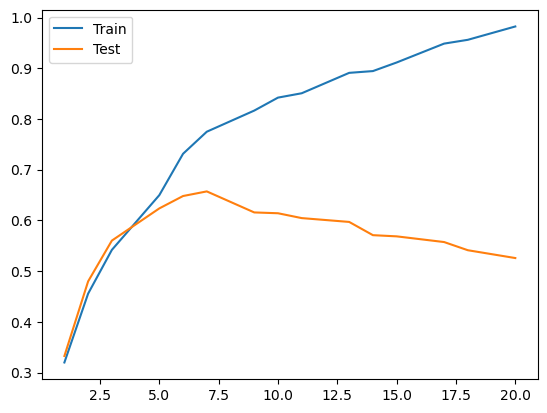

In [97]:
values = [int(x) for x in np.linspace(start=1, stop=20, num=15)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=x, random_state=4)
    model_gb_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train)
    train_precision = precision_score(y_train, y_pred_train_gb_sn)
    train_score.append(train_precision)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test)
    test_precision = precision_score(y_test, y_pred_test_gb_sn)
    test_score.append(test_precision)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_precision) + '; test: ' + str(test_precision))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

we're not gonna continue using this algorithm because too overfiting and we also have already found the better algorithm (Random Forest)

# Business Simulation

## Confusion Matrix

<AxesSubplot:>

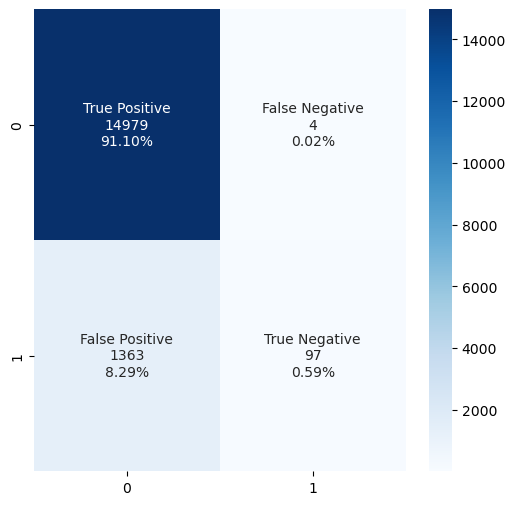

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [99]:
# feature importance
def show_feature_importance(model, title):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(5, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(title, fontsize=10)

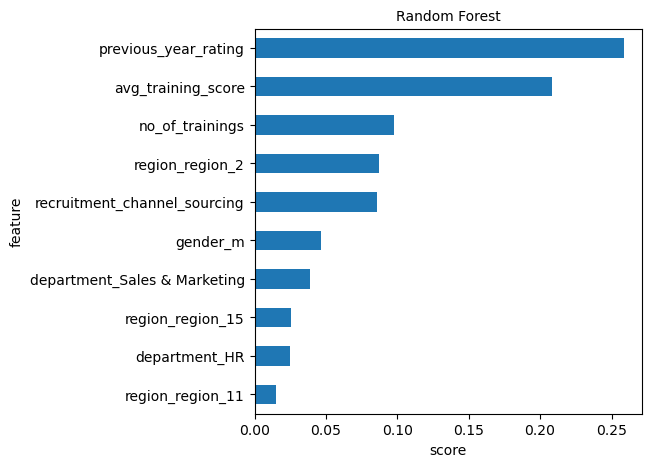

In [100]:
show_feature_importance(model_rf, 'Random Forest')

In [101]:
print('Shape of df_train :', df_train.shape)
print('Shape of df_test :', df_test.shape)

Shape of df_train : (54808, 54)
Shape of df_test : (23490, 52)


In [102]:
simulation_features = X_smote.columns

In [103]:
# Create Simulation Function

def simulation(feature):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()

    # Create Simulation Data
    df_promoted = df_train[df_train.is_promoted == 1][simulation_features]
    df_not_promoted = df_train[df_train.is_promoted == 0][simulation_features]
  
    cr_list = []
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    
    for i in experiments:
        df_simulation = pd.concat([df_promoted.sample(int(np.ceil(0.1*df_promoted.shape[0])), random_state=123), df_not_promoted.sample(int(np.ceil(0.1*df_not_promoted.shape[0])), random_state=123)]).reset_index(drop=True)
        df_simulation[feature] = df_simulation[feature]*(1+i) 
    
    
        # Predict Simulation Values
        simulation_pred = model_rf.predict(df_simulation)

        # Adjust Predicted Value to Actual Value
        simulation_pred_pos = simulation_pred[simulation_pred==0]
        simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
        simulation_pred_pos
        simulation_pred_neg = simulation_pred[simulation_pred==1]
        simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
        simulation_pred_neg
        simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
        # Calculate Simulation Conversion Rate
        cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
        cr_list.append(cr)
    
    # Create CR Plot
    # print(cr_list)
    plt.plot(experiments, cr_list, marker='o', linewidth=1)
    plt.ylabel('Promotion Rate')
    plt.xlabel(str(feature) + ' Increased')
    plt.title('Promotion Rate Increased by ' + str(feature))
    plt.axvline(linewidth=1, color='r', label = 'Current Condition')
    plt.legend()
    plt.show()

## Sensitifity Analysis

### Previous Year Rating

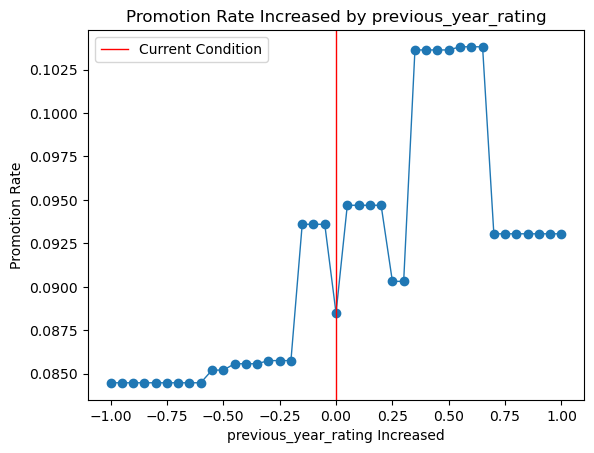

In [107]:
simulation('previous_year_rating')

### Average Training Score

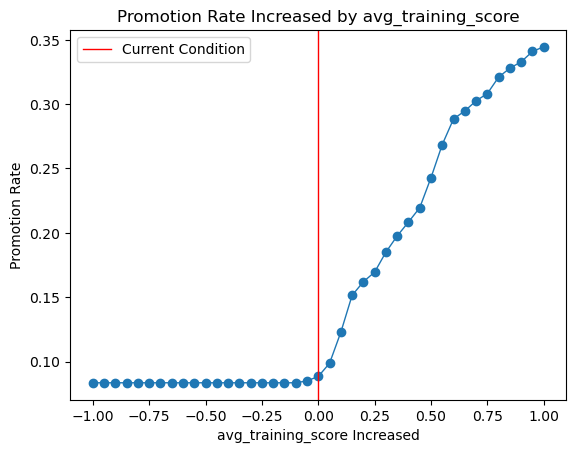

In [108]:
simulation('avg_training_score')

### No of Training

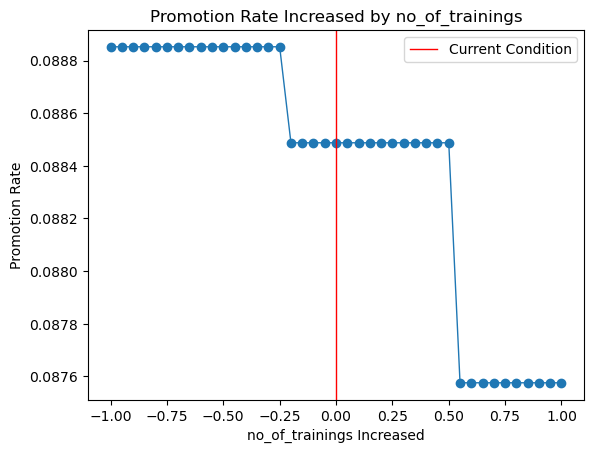

In [109]:
simulation("no_of_trainings")

## Business Simulation

In [61]:
print(df_train['avg_training_score'].describe())
print('\n')
print('Num of unique values :')
print(df_train['avg_training_score'].nunique())

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64


Num of unique values :
61


In [64]:
print(df_train['previous_year_rating'].describe())
print('\n')
print('Num of unique values :')
print(df_train['previous_year_rating'].nunique())
print('\n')
print('Unique Values')
print(df_train['previous_year_rating'].value_counts())

count    54808.000000
mean         3.304481
std          1.214770
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64


Num of unique values :
5


Unique Values
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [110]:
# Create Simulation Function

def simulation(feature, x):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()

    # Create Simulation Data
    df_promoted = df_train[df_train.is_promoted == 1][simulation_features]
    df_not_promoted = df_train[df_train.is_promoted == 0][simulation_features]
  
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    
    df_simulation = pd.concat([df_promoted.sample(int(np.ceil(0.3*df_promoted.shape[0])), random_state=123), df_not_promoted.sample(int(np.ceil(0.3*df_not_promoted.shape[0])), random_state=123)]).reset_index(drop=True)
    df_simulation[feature] = df_simulation[feature]*x 
    
    
    # Predict Simulation Values
    simulation_pred = model_rf.predict(df_simulation)

    # Adjust Predicted Value to Actual Value
    simulation_pred_pos = simulation_pred[simulation_pred==0]
    simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
    simulation_pred_pos
    simulation_pred_neg = simulation_pred[simulation_pred==1]
    simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
    simulation_pred_neg
    simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
    # Calculate Simulation Promotion Rate
    new_pr = simulation_pred[simulation_pred==1].size/simulation_pred.size
    
    # Calculte existing promotion rate
    current_pr = df_train.is_promoted.value_counts()[1]/df_train.is_promoted.shape[0]
    
    # avg cost per hire (US Data) https://www.zippia.com/advice/cost-of-hiring-statistics-average-cost-per-hire/
    cph = 4425 # in dollar
    hiring_target_pct = 0.2 # max num recruiter can hire is 2% from remaining not promoted employees
    num_employees = 54808

    
    # hiring cost current condition
    current_num_employee_will_recruited = hiring_target_pct*(1-current_pr)*num_employees
    current_hc = current_num_employee_will_recruited*cph
    
    # hiring cost after recommendation
    new_num_employee_will_recruited = hiring_target_pct*(1-new_pr)*num_employees
    new_hc = new_num_employee_will_recruited*cph
    
    # percentage cost reduction
    pctg_cost_reduction = round((current_hc-new_hc)/new_hc*100,2)
    
    print(f'Current Average {feature} = {df_train[feature].median()}')
    print(f'Average {feature} after implementing recommendation = {round(df_train[feature].mean()*x)}')
    print('\n')
    print(f'Current Promotion Rate = {current_pr *100:.2f}%')
    print(f'Simulation Promotion Rate After Recommendation = {new_pr *100:.2f}%')
    print('Promotion Rate Increment = ', round((new_pr *100)-(current_pr *100),2))
    print('\n')
    print(f'Current Hiring Cost  = $ {round(current_hc)}')
    print(f'Hiring Cost After Implementing Recommendation = $ {round(new_hc)}')
    print(f'Percetage Hiring Cost Reduction = {pctg_cost_reduction}%')
    print('\n')
    print(f'Current Number of Talent Will Be Recruited = {round(current_num_employee_will_recruited)}')
    print(f'New Number of Talent Will Be Recruited = {round(new_num_employee_will_recruited)}')

In [21]:
# Create Simulation Function

def simulation(feature, variable, x, y):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()

    # Create Simulation Data
    df_promoted = df_train[df_train.is_promoted == 1][simulation_features]
    df_not_promoted = df_train[df_train.is_promoted == 0][simulation_features]
  
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    
    df_simulation = pd.concat([df_promoted.sample(int(np.ceil(0.3*df_promoted.shape[0])), random_state=123), df_not_promoted.sample(int(np.ceil(0.3*df_not_promoted.shape[0])), random_state=123)]).reset_index(drop=True)
    df_simulation[feature] = df_simulation[feature]*x 
    df_simulation[variable] = df_simulation[variable]*y
    
    
    # Predict Simulation Values
    simulation_pred = model_rf.predict(df_simulation)

    # Adjust Predicted Value to Actual Value
    simulation_pred_pos = simulation_pred[simulation_pred==0]
    simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
    simulation_pred_pos
    simulation_pred_neg = simulation_pred[simulation_pred==1]
    simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
    simulation_pred_neg
    simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
    # Calculate Simulation Promotion Rate
    new_pr = simulation_pred[simulation_pred==1].size/simulation_pred.size
    
    # Calculte existing promotion rate
    current_pr = df_train.is_promoted.value_counts()[1]/df_train.is_promoted.shape[0]
    
    # avg cost per hire (US Data) https://www.zippia.com/advice/cost-of-hiring-statistics-average-cost-per-hire/
    cph = 4425 # in dollar
    hiring_target_pct = 0.2 # max num recruiter can hire is 2% from remaining not promoted employees
    num_employees = 54808

    
    # hiring cost current condition
    current_num_employee_will_recruited = hiring_target_pct*(1-current_pr)*num_employees
    current_hc = current_num_employee_will_recruited*cph
    
    # hiring cost after recommendation
    new_num_employee_will_recruited = hiring_target_pct*(1-new_pr)*num_employees
    new_hc = new_num_employee_will_recruited*cph
    
    # percentage cost reduction
    pctg_cost_reduction = round((current_hc-new_hc)/new_hc*100,2)
    
    print(f'Current Average {feature} = {df_train[feature].median()}')
    print(f'Average {feature} after implementing recommendation = {round(df_train[feature].mean()*x)}')
    print('\n')
    print(f'Current Promotion Rate = {current_pr *100:.2f}%')
    print(f'Simulation Promotion Rate After Recommendation = {new_pr *100:.2f}%')
    print('Promotion Rate Increment = ', round((new_pr *100)-(current_pr *100),2))
    print('\n')
    print(f'Current Hiring Cost  = $ {round(current_hc)}')
    print(f'Hiring Cost After Implementing Recommendation = $ {round(new_hc)}')
    print(f'Percetage Hiring Cost Reduction = {pctg_cost_reduction}%')
    print('\n')
    print(f'Current Number of Talent Will Be Recruited = {round(current_num_employee_will_recruited)}')
    print(f'New Number of Talent Will Be Recruited = {round(new_num_employee_will_recruited)}')

### Simulation 1 : Increase 10% of Average Training Score

In [111]:
simulation('avg_training_score', 1.10)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 70


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 12.41%
Promotion Rate Increment =  3.9


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 42484350
Percetage Hiring Cost Reduction = 4.45%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 9601


### Simulation 2: Increase 20% of Average Training Score

In [112]:
simulation('avg_training_score', 1.20)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 76


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 16.64%
Promotion Rate Increment =  8.12


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 40434175
Percetage Hiring Cost Reduction = 9.74%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 9138


### Simulation 3: Increase 30% of Average Training Score

In [113]:
simulation('avg_training_score', 1.30)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 82


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 18.95%
Promotion Rate Increment =  10.43


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 39313215
Percetage Hiring Cost Reduction = 12.87%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 8884


### Simulation 4: Increase 10% of Previous Year Rating

In [114]:
simulation('previous_year_rating', 1.10)

Current Average previous_year_rating = 3.0
Average previous_year_rating after implementing recommendation = 4


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 9.52%
Promotion Rate Increment =  1.0


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 43888498
Percetage Hiring Cost Reduction = 1.11%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 9918


### Combine Simulation 3 and Simulation 4 (1)

Using 30% increment of `Avg Training Score` and 10% Increment of `Previous Year Rating`

In [117]:
simulation('avg_training_score', 'previous_year_rating', 1.30, 1.10)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 82


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 24.63%
Promotion Rate Increment =  16.11


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 36558016
Percetage Hiring Cost Reduction = 21.38%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 8262


### Combine Simulation 2 and Simulation 4 (2)

Using 20% increment of `Avg Training Score` and 10% Increment of `Previous Year Rating`

In [118]:
simulation('avg_training_score', 'previous_year_rating', 1.20, 1.10)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 76


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 21.30%
Promotion Rate Increment =  12.78


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 38174557
Percetage Hiring Cost Reduction = 16.24%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 8627


### Combine Simulation 1 and Simulation 4 (3)

Using 10% increment of `Avg Training Score` and 10% Increment of `Previous Year Rating`

In [119]:
simulation('avg_training_score', 'previous_year_rating', 1.10, 1.10)

Current Average avg_training_score = 60.0
Average avg_training_score after implementing recommendation = 70


Current Promotion Rate = 8.52%
Simulation Promotion Rate After Recommendation = 15.42%
Promotion Rate Increment =  6.9


Current Hiring Cost  = $ 44373900
Hiring Cost After Implementing Recommendation = $ 41027103
Percetage Hiring Cost Reduction = 8.16%


Current Number of Talent Will Be Recruited = 10028
New Number of Talent Will Be Recruited = 9272
